Time series analysis in deep learning involves using neural networks and other deep learning techniques to analyze and make predictions based on time-ordered data. Time series data consists of observations or measurements recorded at regular intervals over time, such as stock prices, weather data, or sensor readings.

Deep learning models can be applied to various time series analysis tasks, including:

**Time Series Forecasting**: Predicting future values of a time series based on past observations. This can be useful in various applications such as sales forecasting, demand prediction, and financial market analysis.

**Anomaly Detection**: Identifying unusual patterns or outliers in time series data that deviate from normal behavior. Anomalies could indicate potential issues or interesting events that require further investigation.

**Classification**: Categorizing time series data into different classes or categories based on patterns or features extracted from the data. For example, classifying human activities based on accelerometer data or classifying EEG signals into different brain states.

**Generative Modeling**: Generating new samples of time series data that resemble the patterns observed in the training data. This can be useful for data augmentation or generating synthetic data for training other models.

**SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) is a popular time series forecasting algorithm that extends the **ARIMA** model to account for seasonality and exogenous variables. It is commonly used for modeling and forecasting time series data that exhibit seasonal patterns and can incorporate additional variables that may influence the time series. SARIMAX models are useful for various forecasting tasks, including sales forecasting, inventory management, and economic forecasting. They can capture complex temporal dependencies and provide interpretable results that help understand the underlying dynamics of the time series data.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df= pd.read_csv("oil price.csv")
df.head()

Date   Open   High    Low  Close*  Adj Close**     Volume
0  05-Feb-24  72.75  73.28  71.41   72.78        72.78    350,843
1  29-Jan-24  78.90  79.29  71.79   72.28        72.28  2,069,364
2  22-Jan-24  73.41  78.26  72.89   78.01        78.01  1,687,703
3  15-Jan-24  72.63  74.91  70.50   73.41        73.41  1,314,632
4  08-Jan-24  73.51  75.25  70.13   72.68        72.68  1,885,747

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1206 non-null   object 
 1   Open         1206 non-null   float64
 2   High         1206 non-null   float64
 3   Low          1206 non-null   float64
 4   Close*       1206 non-null   float64
 5   Adj Close**  1206 non-null   float64
 6   Volume       1206 non-null   object 
dtypes: float64(5), object(2)
memory usage: 66.1+ KB


In [39]:
# for drowing plot , first step we should change date(object) format----> time/date format
df["Date"] = df["Date"].apply(pd.to_datetime)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1206 non-null   datetime64[ns]
 1   Open         1206 non-null   float64       
 2   High         1206 non-null   float64       
 3   Low          1206 non-null   float64       
 4   Close*       1206 non-null   float64       
 5   Adj Close**  1206 non-null   float64       
 6   Volume       1206 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 66.1+ KB


In [6]:
# next step set date as index
df.set_index("Date" , inplace=True)

In [8]:
df["Open"].head()

Date
2024-02-05    72.75
2024-01-29    78.90
2024-01-22    73.41
2024-01-15    72.63
2024-01-08    73.51
Name: Open, dtype: float64

<Axes: xlabel='Date'>

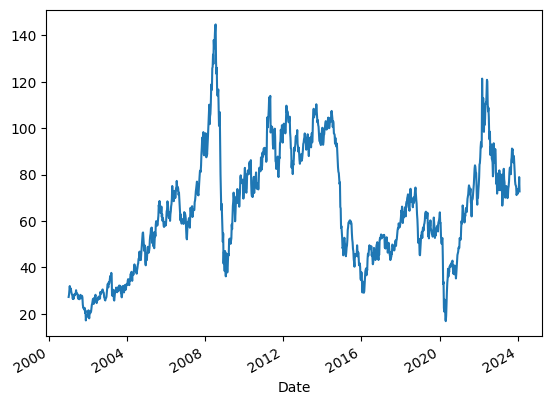

In [7]:
df["Open"].plot()

when we put date as index  , Date ---> index so you can not see as feature
so for next cell you have to reset run_time before adding date as index to have  "Date" as feature and after df["date"] you didnt get error.

In [17]:
# Check the column names
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


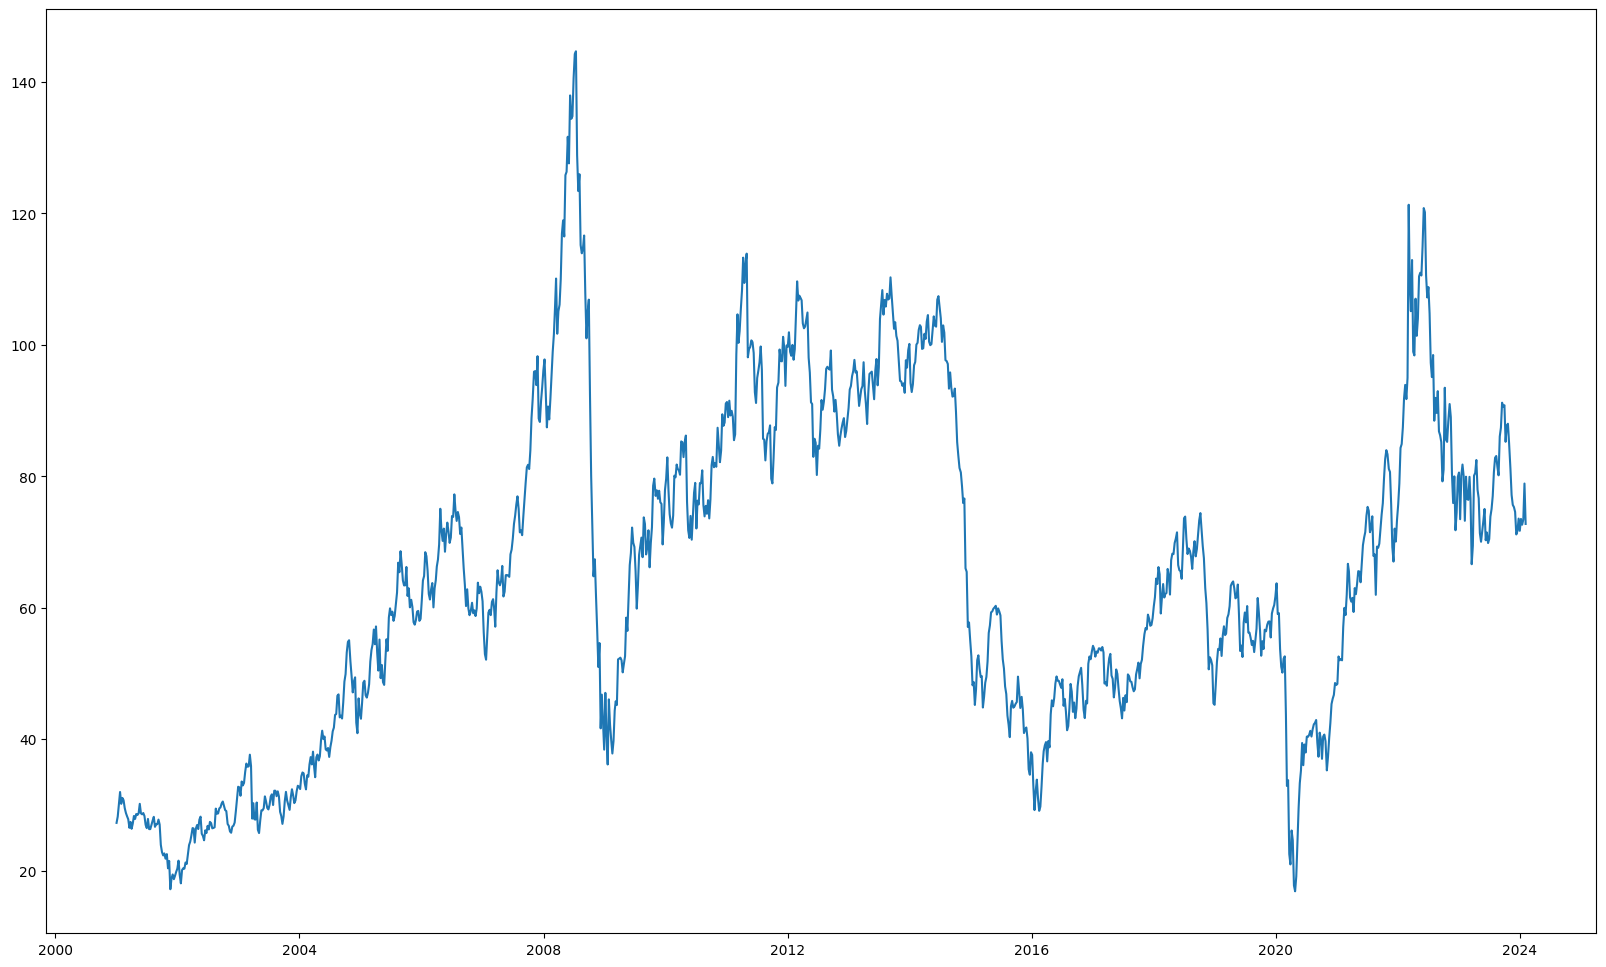

In [18]:
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.show()

In the context of time series analysis, a **stationary time series ** is one whose statistical properties such as **mean, variance, and autocorrelation remain constant over time**. This means that the data does not exhibit trends or seasonality, and the statistical properties do not change with time.

Formally, a time series  is said to be stationary if it satisfies the following conditions:

Constant mean: The mean of the series remains constant over time.
Constant variance: The variance of the series remains constant over time.
Constant autocovariance: The autocovariance.

Stationarity is important in time series analysis because **many forecasting methods assume that the underlying data is stationary.** Non-stationary data can lead to unreliable forecasts and incorrect conclusions. Therefore, it is often necessary to transform or preprocess non-stationary data to make it stationary before applying forecasting models.

In summary, **stationary data refers to time series data that exhibits constant statistical properties over time, including mean, variance, and autocorrelation**.

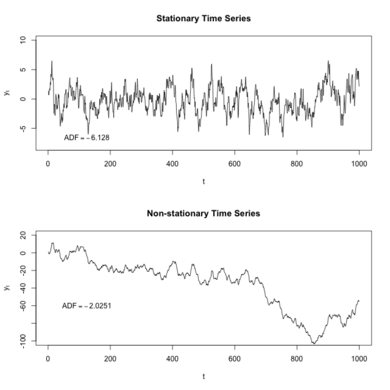

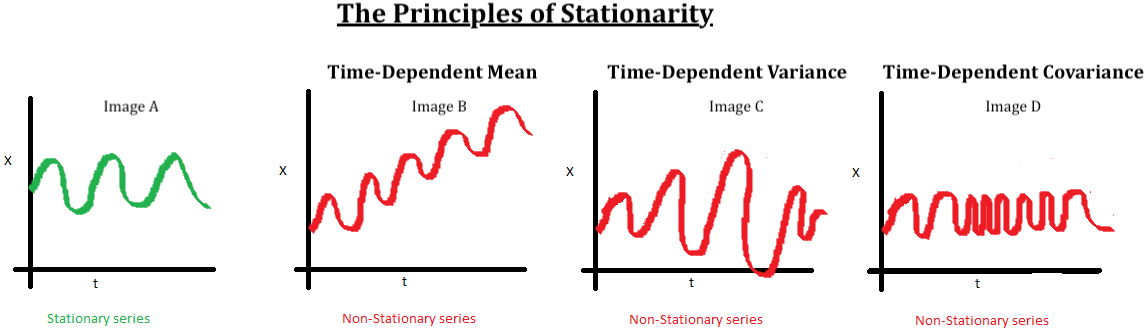

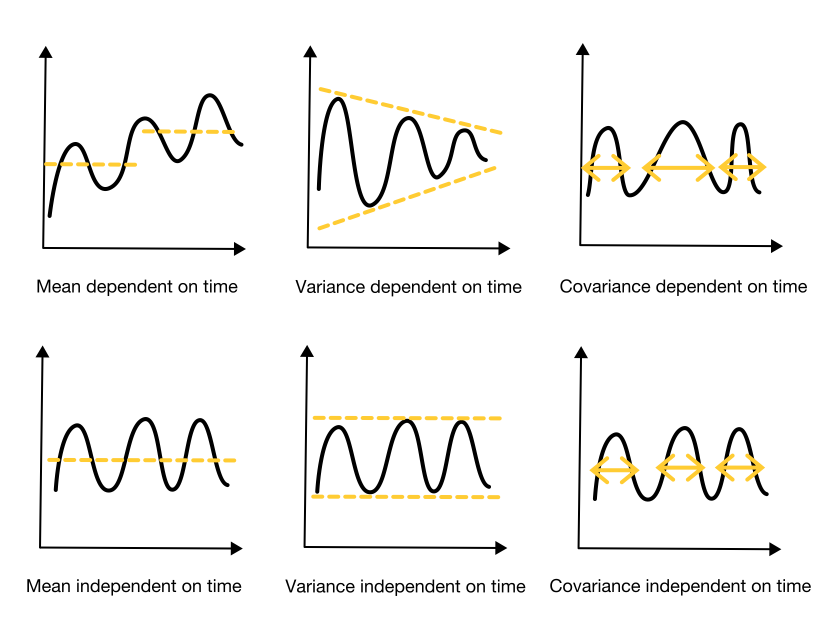

When a time series is stationary, it means that certain attributes of the data do not change over time. However, some time series are non-stationary, whereby values and associations between and among variables do vary with time. In finance, many processes are non-stationary, and so must be handled appropriate.

most of time_series **algorithum work** with **stationary data**.


how detect stationary and not stationary:

1- watching the graph of data ---> more simple and accurate method

2- **augmented Dickey-Fuller test: ADF test** is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. It is one of the most commonly used **statistical test** when it comes to analyzing the stationary of a series.


- Adfuller work with **p_value so should be less than 5 percent** .



In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["Open"])

# 0.12202939397110063 = p_value -----> should be less than 5 percent for stationary data
# here we have not-stationary becouse (0.12 > 0.05)

(-2.473604623007886,
 0.12202939397110063,
 22,
 1183,
 {'1%': -3.4358897684764886,
  '5%': -2.8639862448409055,
  '10%': -2.5680724298154542},
 6123.707019264774)

# data cleaning ( make staionary data) in Time Series.

- the first method to **change non_stationary** data to ----> stationary data  is using  **Logarithm**.

- the second methhod is **calculates the difference of** a DataFrame element compared with another element diff in pandas, The **diff() method** returns a DataFrame with the difference between the values for each row and, by default, the previous row.


In [20]:
# step 1 ----> LOG
df["Open"] = np.log(df["Open"])
adfuller(df["Open"])

(-1.9371230173331464,
 0.3148037564086622,
 11,
 1194,
 {'1%': -3.4358386217286885,
  '5%': -2.8639636801920956,
  '10%': -2.5680604125597277},
 -3557.5050227702577)

In [24]:
# step 2 ---> diff()
df["Open"] = df["Open"].diff()



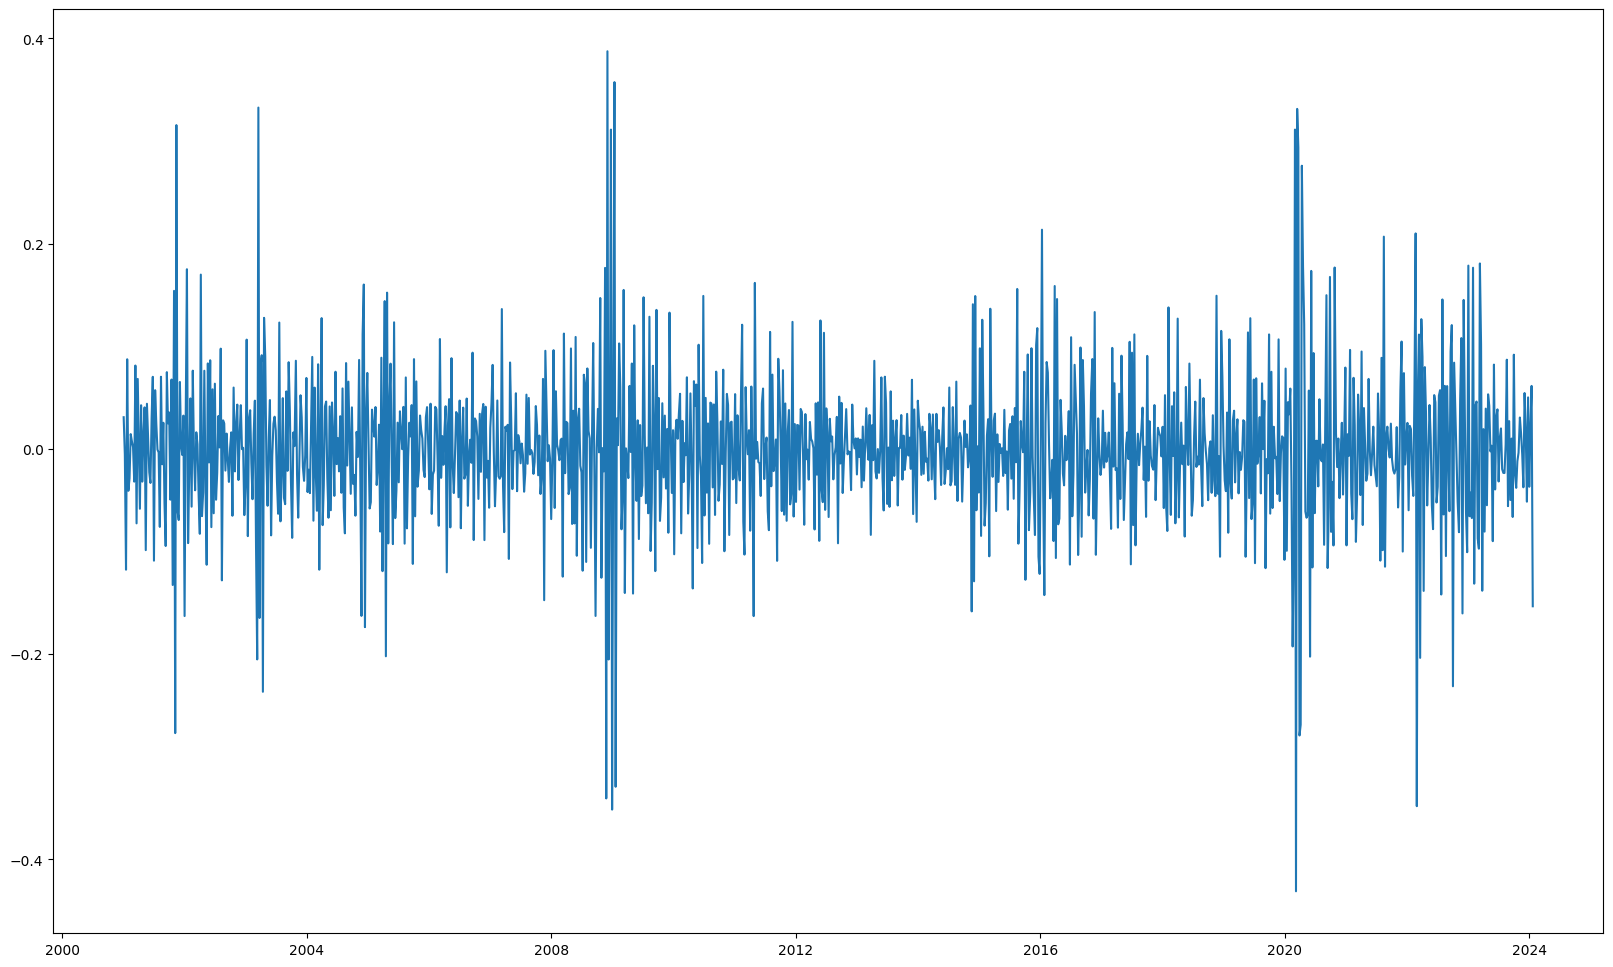

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.show()

when use **Diff()** is diffrent value between 2 index, so for **first index **diff() **return null value**.

and Adfuller give us error because of this non_value so we have to **remove first index to calculate Adfuller** after using Log and Diff() steps.

In [27]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Drop rows with missing values
df.dropna(inplace=True)

# Drop rows with infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Perform the Augmented Dickey-Fuller test
adfuller_result = adfuller(df["Open"])


In [28]:
adfuller_result


# 2.3e-5 ----> 0.000023

# 1.1238553568416582e-24 ---> almost zero ---> our data now is stationary

(-13.195036548827018,
 1.1238553568416582e-24,
 21,
 1182,
 {'1%': -3.4358944654892474,
  '5%': -2.86398831702468,
  '10%': -2.5680735334014733},
 -3488.6864010843037)

 In the **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) algorithm, the parameters **AR, I, MA, and S** refer to the components used to model the time series data.

- AR (AutoRegressive) ---> n_gram:

AR is the autoregressive term, which represents the correlation between the current observation and its previous observations.
It captures the relationship between an observation and a number of lagged observations ( how past values influence the current value).
The AR parameter (p) represents the number of lag observations included in the model.

Range: Typically, the **AR parameter can range from** 0 to any positive integer. A common range might be from **0 to 10**, depending on the complexity of the time series.


- I (Integrated): ---> differntial number

I is the differencing term, which represents the number of times the data is differenced to achieve stationarity.
It is used to remove trends and make the data stationary.
The I parameter (d) represents the order of differencing.

Range: Typically, the I parameter is an integer greater than or equal to 0. A common range might be **from 0 to 2**.


- MA (Moving Average):


The MA parameter (q) This component models the error term as a linear combination of error terms at previous time points..


**MA almost is the same with AR** but **in AR we use pervious values** to **predict new values and in MA we using pervious noise  to predict new values**

in **AR we have p** as number of pervious values in **MA we have q** as pervious noises.

in AR  use regression algorithum in MA  we use linear combination of error.

q is the size of the **moving average window**.

Range: Typically, the **MA parameter can range** from 0 to any positive integer. A common range might be from **0 to 10**, similar to the AR parameter.


S (Seasonal Order):

S represents the seasonal component of the model, accounting for periodic fluctuations in the data.
It captures the seasonality pattern in the time series.
The S parameter (P, D, Q, and m) represents the seasonal autoregressive, differencing, moving average, and seasonal period, respectively.

Range: Each seasonal component (P, D, Q) can have a range similar to the non-seasonal components, while the seasonal period (m) is typically determined based on the seasonality of the data.

When using SARIMAX, you'll need to select appropriate values for these parameters based on the characteristics of your time series data and through techniques such as grid search or iterative model fitting.

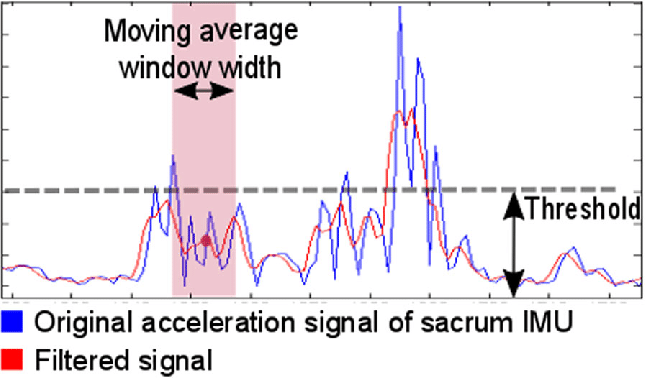

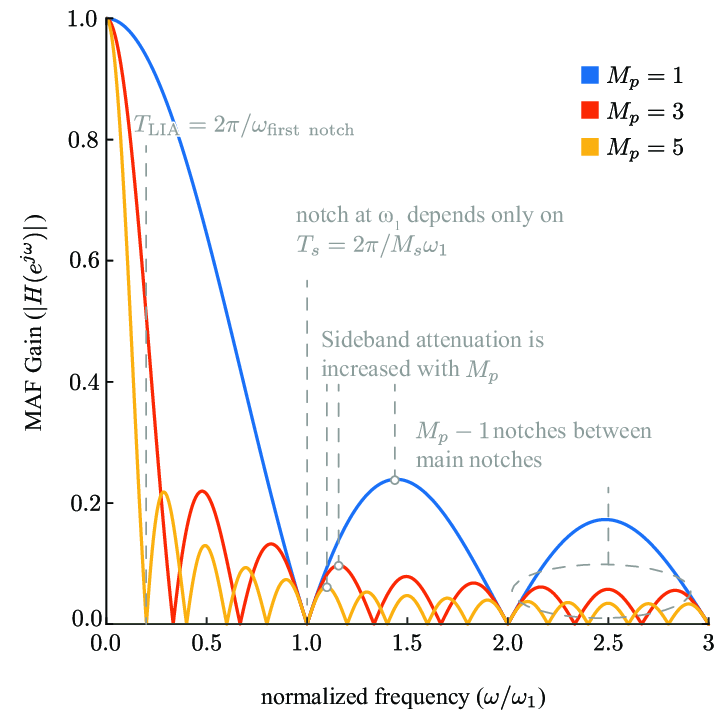

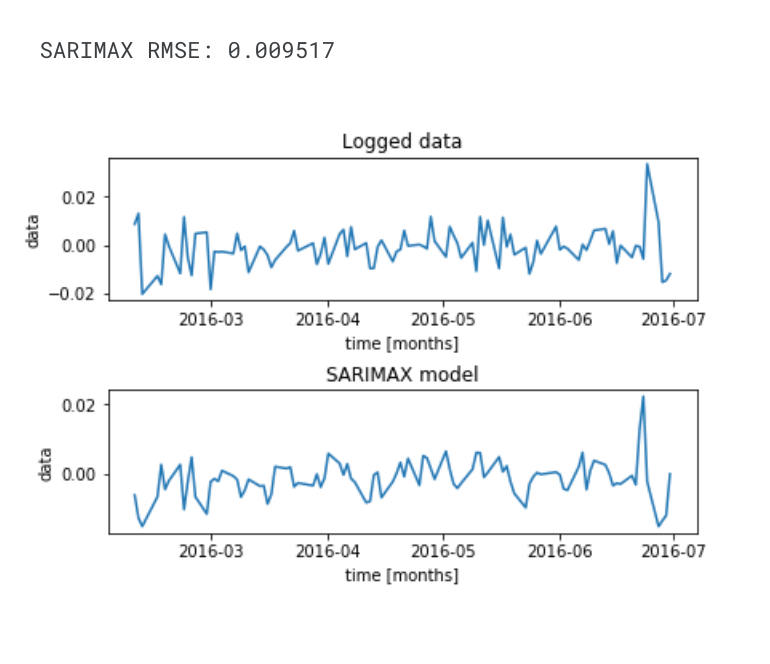

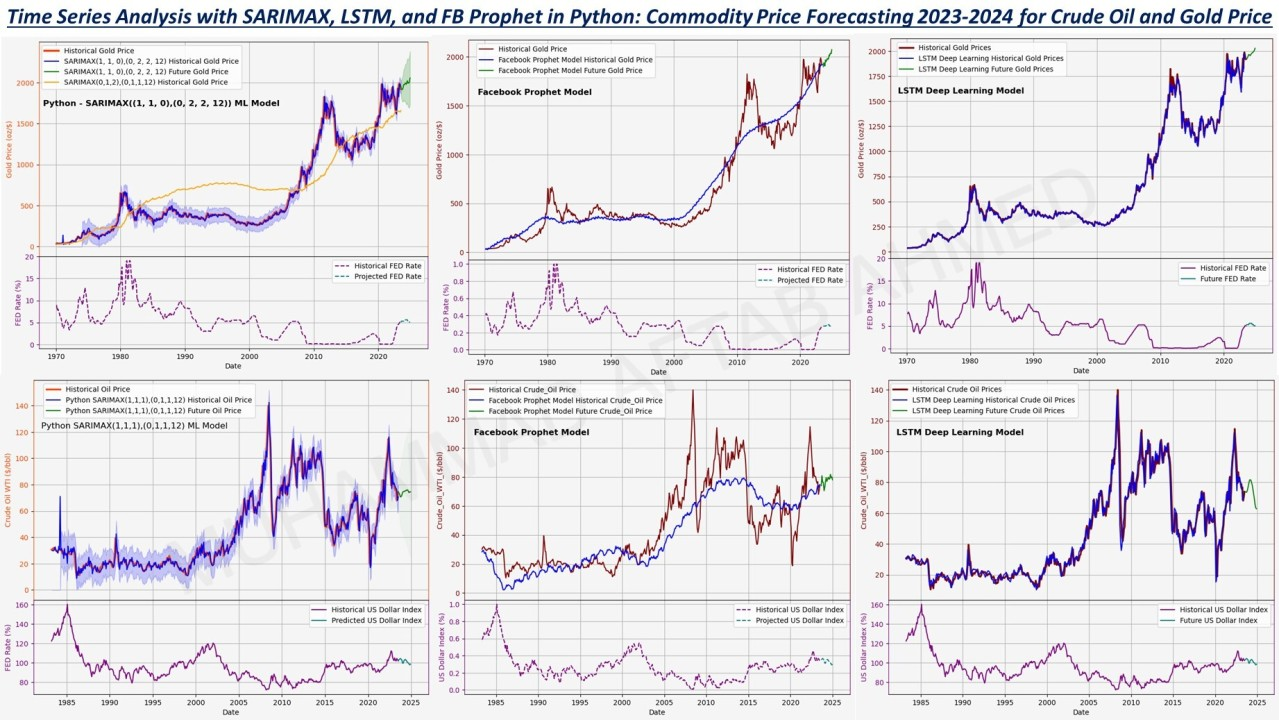

SARIMAX ----> S AR I MA
AR --->  for prediction new point , how many pervious point should be consider
the same as m_gram concept in text_mining (to predict new word how many pervious word should be consider) could be 3, 4,...10 ,.....

I ---->  is different number in diff() function , for different between two index bydefult it calculate with pervious one so I=1 , but we can change diff fuction give as different for example with 3 pervious, in this example assume we have this data : 1,2,2,4,9 ,.... and I=3 in the retrun result of diff() we has nul, nul, nul, 3(4_1), 7(9-2) ,... and you can 3 first 3 result is nul=Nane
because we didnt has any 3th pervious data to calculate defferent.

MA---> moving average

S ---> seasonal data






In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [30]:
model = SARIMAX(df["Open"] , order=(3,1,3) , seasonal_order=(2,1,2,4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
response= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   Open   No. Observations:                 1204
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                1683.431
Date:                                Sat, 10 Feb 2024   AIC                          -3344.861
Time:                                        05:29:47   BIC                          -3288.880
Sample:                                             0   HQIC                         -3323.773
                                               - 1204                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0415      0.077    -13.461      0.000      -1.193      -0.890
ar.L2         -0.1342      0.063     -2.118      0.034      -0.258      -0.010
ar.L3         -0.0350      0.045     -0.781      0.435      -0.123       0.053
ma.L1         -0.8079      0.073    -11.073      0.000      -0.951      -0.665
ma.L2         -0.9006      0.103     -8.722      0.000      -1.103      -0.698
ma.L3          0.7542      0.045     16.581      0.000       0.665       0.843
ar.S.L4       -0.7959      0.165     -4.821      0.000      -1.119      -0.472
ar.S.L8        0.0673      0.041      1.644      0.100      -0.013       0.147
ma.S.L4       -0.1065      0.165     -0.646      0.518      -0.430       0.217
ma.S.L8       -0.8852      0.166     -5.321      0.000      -1.211      -0.559
sigma2         0.0036      0.000     35.508      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):              1792.54
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**AIC stands for Akaike Information Criterion**, which is a measure used to evaluate the goodness of fit of a statistical model. In SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) modeling, the AIC is commonly used to compare different models and select the best one for a given dataset.

The AIC quantifies the trade-off between the goodness of fit of the model and the complexity of the model. It penalizes more complex models to prevent overfitting. The lower the AIC value, the better the model is considered to be.

The range of AIC values depends on the specific dataset and the complexity of the models being compared. **In general, lower AIC values indicate better models**. However, there is no predefined range for AIC that guarantees the best result. It's essential to compare AIC values across different models and select the one with the lowest AIC as the best model for the given dataset.

During the modeling process, **practitioners often perform a grid search** or use optimization techniques to find the model parameters that **minimize** the **AIC value** , indicating the best balance between model fit and complexity.

In [34]:
df["SARIMAX"] = response.fittedvalues
df.head()

# you can comapre the resulte of real value in df["Open"] with Sarimax prediction in df["SARIMAX"]

Date      Open   High    Low  Close*  Adj Close**     Volume   SARIMAX
2 2024-01-22 -0.153273  78.26  72.89   78.01        78.01  1,687,703  0.000000
3 2024-01-15  0.061439  74.91  70.50   73.41        73.41  1,314,632 -0.153273
4 2024-01-08  0.022725  75.25  70.13   72.68        72.68  1,885,747  0.061439
5 2024-01-01 -0.036835  74.24  69.28   73.81        73.81  1,335,845  0.022725
6 2023-12-25  0.050262  76.18  71.25   71.65        71.65    939,272 -0.113471

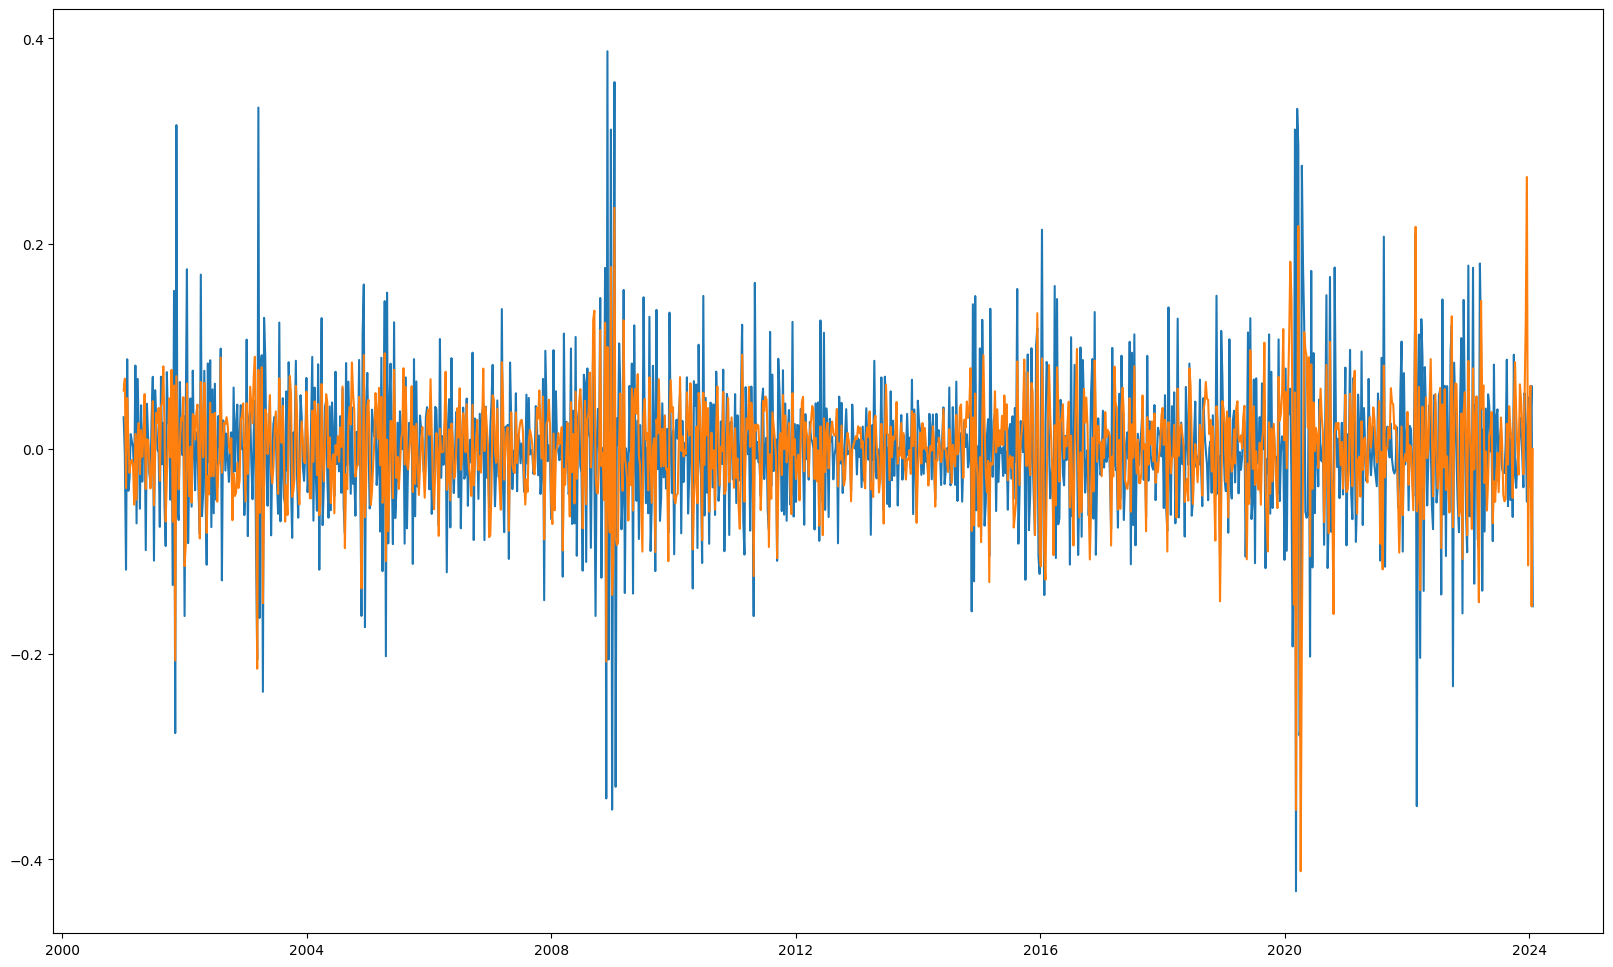

In [35]:
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.plot(df["Date"] , df["SARIMAX"])
plt.show()

# using SARIMAX to stationary and prediction

this algorithum making stationary inside itself and we dont need 1-Log 2-DIFF() and ,...

We using log and diff() to find estimation parametere for SARIMAX , for example order=(3,1,3) after diff() we understand I =1 is enogh for this dataset.

In [41]:
model = SARIMAX(df["Open"] , order=(3,1,3) , seasonal_order=(2,1,2,4))

In [42]:
response= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   Open   No. Observations:                 1206
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood               -3121.178
Date:                                Sat, 10 Feb 2024   AIC                           6264.357
Time:                                        06:39:32   BIC                           6320.357
Sample:                                             0   HQIC                          6285.451
                                               - 1206                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0092      0.260      0.036      0.972      -0.500       0.518
ar.L2          0.1594      0.185      0.861      0.389      -0.204       0.522
ar.L3          0.3997      0.162      2.467      0.014       0.082       0.717
ma.L1         -0.0100      0.265     -0.038      0.970      -0.530       0.510
ma.L2         -0.2040      0.193     -1.059      0.289      -0.581       0.173
ma.L3         -0.2829      0.174     -1.625      0.104      -0.624       0.058
ar.S.L4       -0.7754      0.233     -3.321      0.001      -1.233      -0.318
ar.S.L8        0.0526      0.033      1.581      0.114      -0.013       0.118
ma.S.L4       -0.1785      0.245     -0.728      0.467      -0.659       0.302
ma.S.L8       -0.8043      0.242     -3.319      0.001      -1.279      -0.329
sigma2        10.4455      0.264     39.530      0.000       9.928      10.963
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1654.15
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
df["SARIMAX"] = response.fittedvalues
df.head()

Date   Open   High    Low  Close*  Adj Close**     Volume     SARIMAX
0 2024-02-05  72.75  73.28  71.41   72.78        72.78    350,843    0.000000
1 2024-01-29  78.90  79.29  71.79   72.28        72.28  2,069,364   72.749951
2 2024-01-22  73.41  78.26  72.89   78.01        78.01  1,687,703   78.899959
3 2024-01-15  72.63  74.91  70.50   73.41        73.41  1,314,632   73.410094
4 2024-01-08  73.51  75.25  70.13   72.68        72.68  1,885,747  109.005017

In [49]:
df.tail()

Date   Open  High    Low  Close*  Adj Close**   Volume    SARIMAX
1201 2001-01-29  30.15  31.3  28.25   31.25        31.25  361,646  31.105765
1202 2001-01-22  31.95  32.7  28.64   29.78        29.78  372,589  30.381743
1203 2001-01-15  30.10  32.4  29.00   32.10        32.10  229,617  31.916129
1204 2001-01-08  28.20  30.2  26.90   30.05        30.05  353,371  29.948728
1205 2001-01-01  27.25  28.8  26.60   28.00        28.00  257,184  28.439184

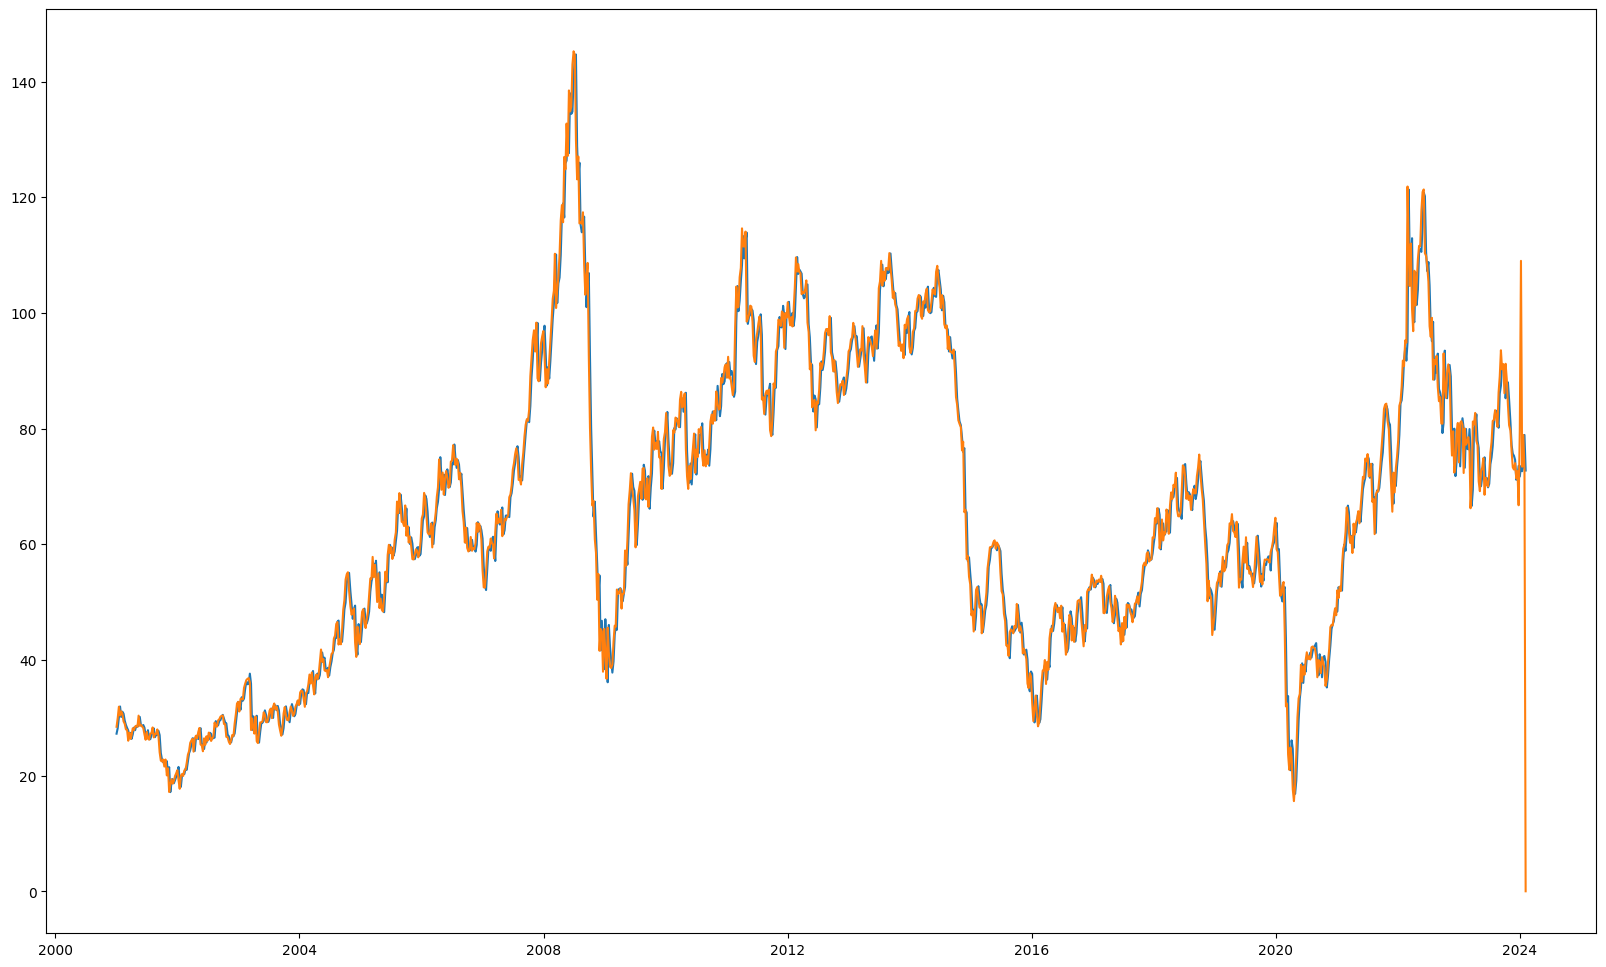

In [45]:
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.plot(df["Date"] , df["SARIMAX"])
plt.show()

In [46]:
print(len(df))

# 1206 ---> 1206 week data

1206


In [47]:
# first 5 index ----> NaN
df["SARIMAX"][:5]= np.NaN
forcast= response.predict(start = len(df) , end= len(df) + 54 )
# len(df) + 54 ----> forcast for next year, each year has 54 week.


<ipython-input-47-30922ffe36a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SARIMAX"][:5]= np.NaN


In [48]:
forcast

1206    27.333544
1207    26.890209
1208    26.748256
1209    26.555241
1210    26.593130
1211    26.288753
1212    26.137989
1213    26.019314
1214    26.089167
1215    25.853324
1216    25.811453
1217    25.726067
1218    25.811608
1219    25.542301
1220    25.442904
1221    25.354977
1222    25.439520
1223    25.213881
1224    25.174198
1225    25.096120
1226    25.189456
1227    24.932987
1228    24.847615
1229    24.765439
1230    24.854433
1231    24.626231
1232    24.581317
1233    24.504194
1234    24.598155
1235    24.347396
1236    24.269440
1237    24.188801
1238    24.279197
1239    24.047812
1240    23.997939
1241    23.920564
1242    24.014200
1243    23.766783
1244    23.693541
1245    23.613565
1246    23.704597
1247    23.470708
1248    23.417125
1249    23.339389
1250    23.432652
1251    23.187463
1252    23.117434
1253    23.037846
1254    23.129260
1255    22.893559
1256    22.837329
1257    22.759304
1258    22.852277
1259    22.608631
1260    22.540841
Name: pred

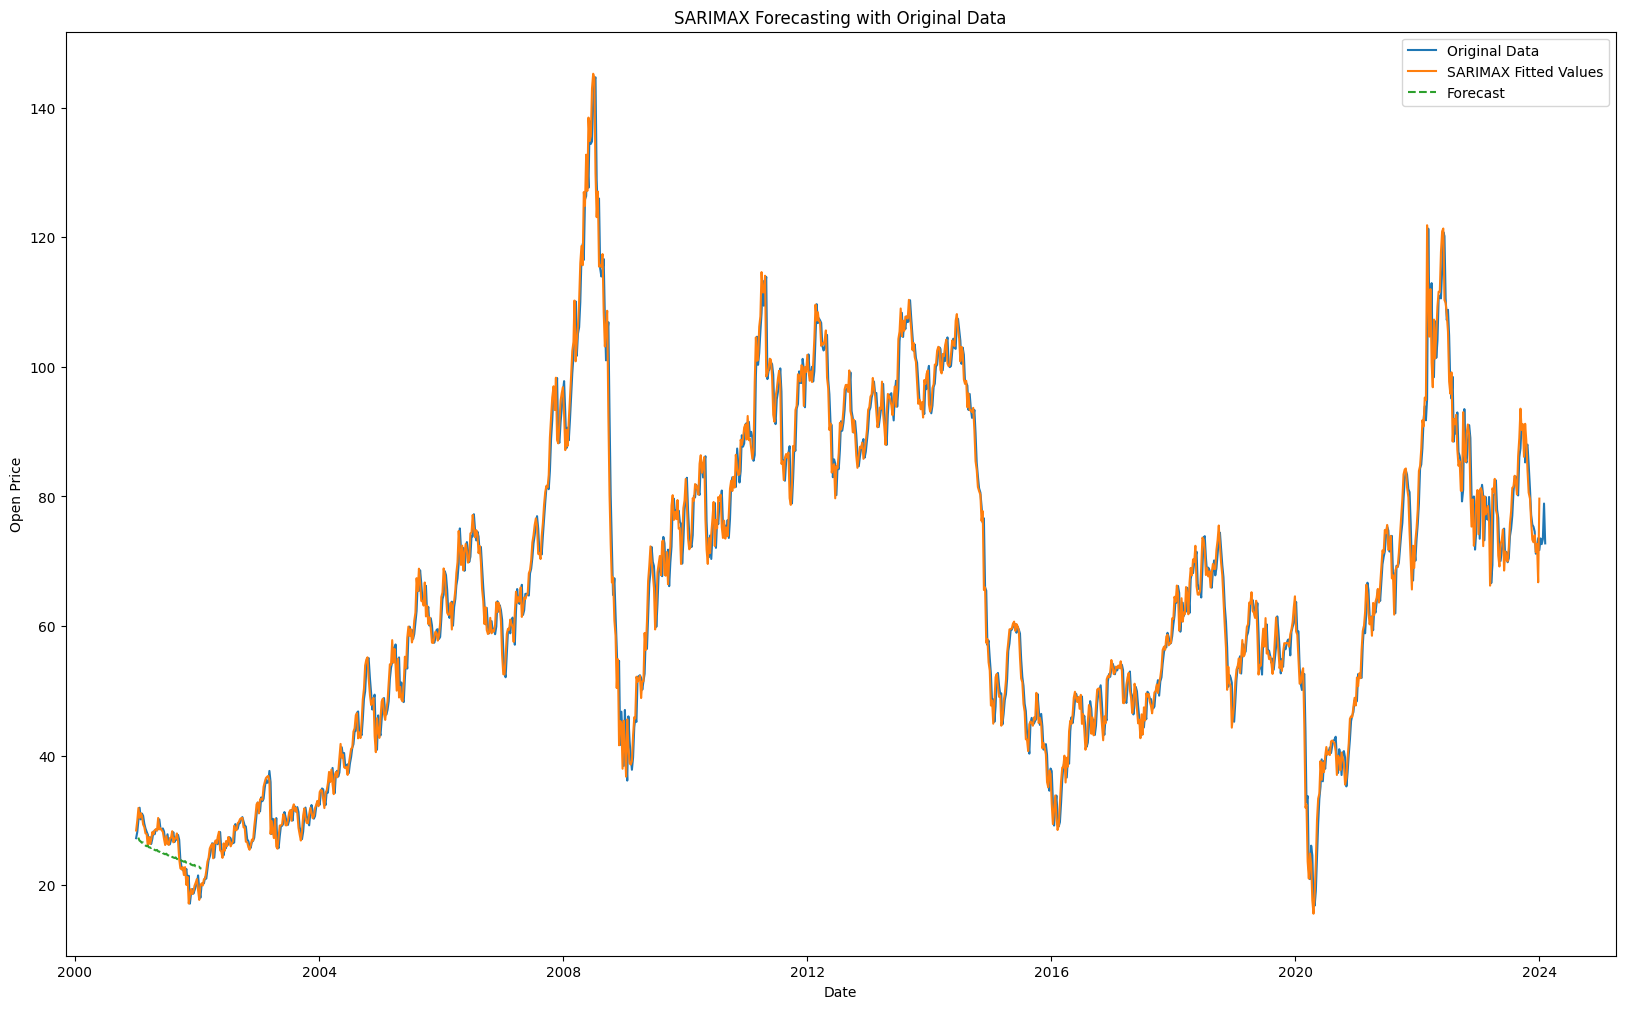

In [50]:
import matplotlib.pyplot as plt

# Plotting previous chart with SARIMAX predictions
plt.figure(figsize=(20, 12))
plt.plot(df["Date"], df["Open"], label="Original Data")
plt.plot(df["Date"], df["SARIMAX"], label="SARIMAX Fitted Values")

# Plotting forecasted values
forecast_dates = pd.date_range(start=df["Date"].iloc[-1], periods=len(forcast)+1, freq='W')[1:]
plt.plot(forecast_dates, forcast, label="Forecast", linestyle='--')

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("SARIMAX Forecasting with Original Data")
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("oil price.csv")
df.head()

Date   Open   High    Low  Close*  Adj Close**     Volume
0  05-Feb-24  72.75  73.28  71.41   72.78        72.78    350,843
1  29-Jan-24  78.90  79.29  71.79   72.28        72.28  2,069,364
2  22-Jan-24  73.41  78.26  72.89   78.01        78.01  1,687,703
3  15-Jan-24  72.63  74.91  70.50   73.41        73.41  1,314,632
4  08-Jan-24  73.51  75.25  70.13   72.68        72.68  1,885,747

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1206 non-null   object 
 1   Open         1206 non-null   float64
 2   High         1206 non-null   float64
 3   Low          1206 non-null   float64
 4   Close*       1206 non-null   float64
 5   Adj Close**  1206 non-null   float64
 6   Volume       1206 non-null   object 
dtypes: float64(5), object(2)
memory usage: 66.1+ KB


In [3]:
# Check the column names
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


In [5]:
# Create a new DataFrame with only the 'Date' and 'Open' columns
new_df = df[['Date', 'Open']].copy()

# Display the first few rows of the new DataFrame
print(new_df.head())


        Date   Open
0  05-Feb-24  72.75
1  29-Jan-24  78.90
2  22-Jan-24  73.41
3  15-Jan-24  72.63
4  08-Jan-24  73.51


In [7]:
print(new_df.tail())

           Date   Open
1201  29-Jan-01  30.15
1202  22-Jan-01  31.95
1203  15-Jan-01  30.10
1204  08-Jan-01  28.20
1205  01-Jan-01  27.25


In [8]:
# make new dataset with first index related to first day /time of samples, last one is updated one/last update
# Reverse the order of rows in the DataFrame
reversed_df = new_df.iloc[::-1]

# Reset the index
reversed_df.reset_index(drop=True, inplace=True)

# Display the reversed DataFrame
print(reversed_df.head())


        Date   Open
0  01-Jan-01  27.25
1  08-Jan-01  28.20
2  15-Jan-01  30.10
3  22-Jan-01  31.95
4  29-Jan-01  30.15


In [14]:
import os

# Specify the folder path
save_folder = r"C:\Users\HP\Downloads"

# Create the directory if it doesn't exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Save the reversed DataFrame to a new CSV file in the specified folder
reversed_df.to_csv(os.path.join(save_folder, 'reversed_data.csv'), index=False)


for download this dataset:

- it save in this directory, where is that?

1- go to google drive

2- find the jupyther file you working on it, click and open it

3- new dataset is on the directory of this file you can right click on it and download in your computer and enjoy

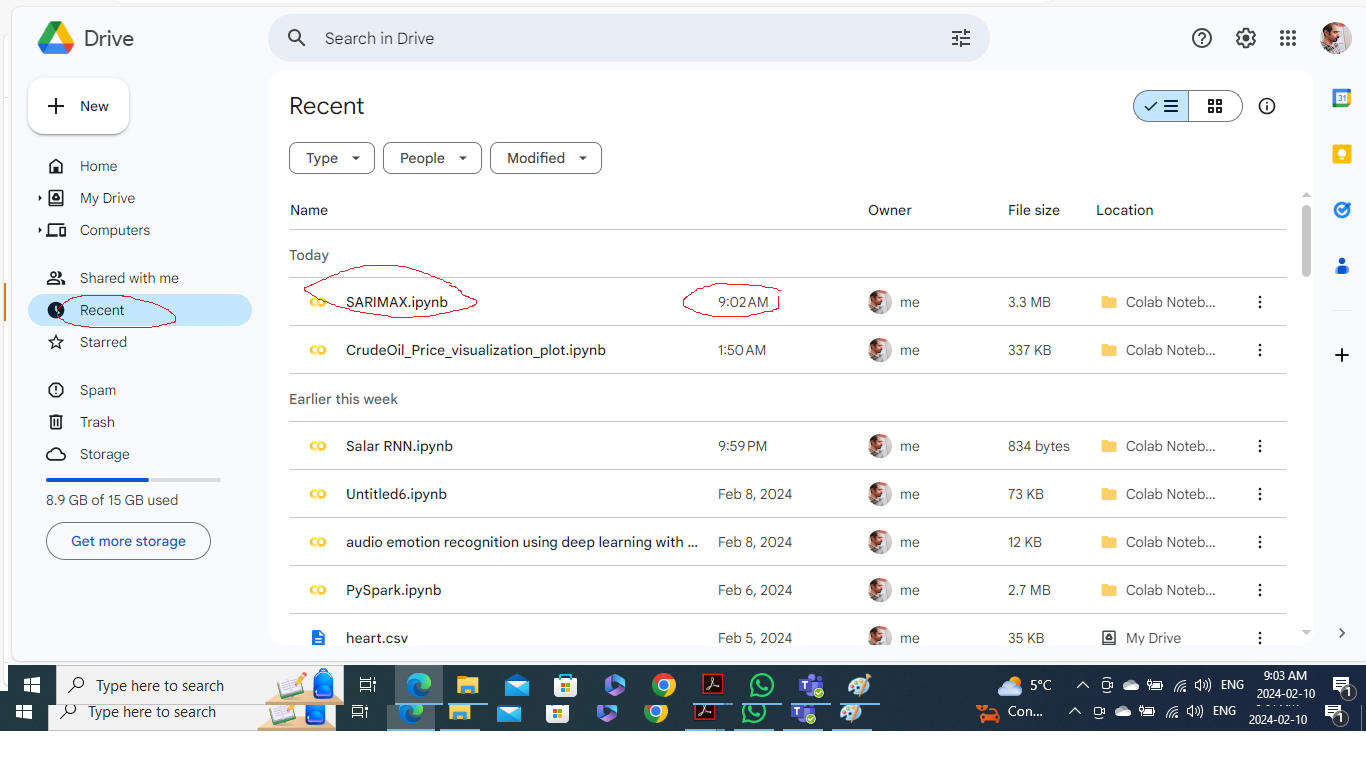

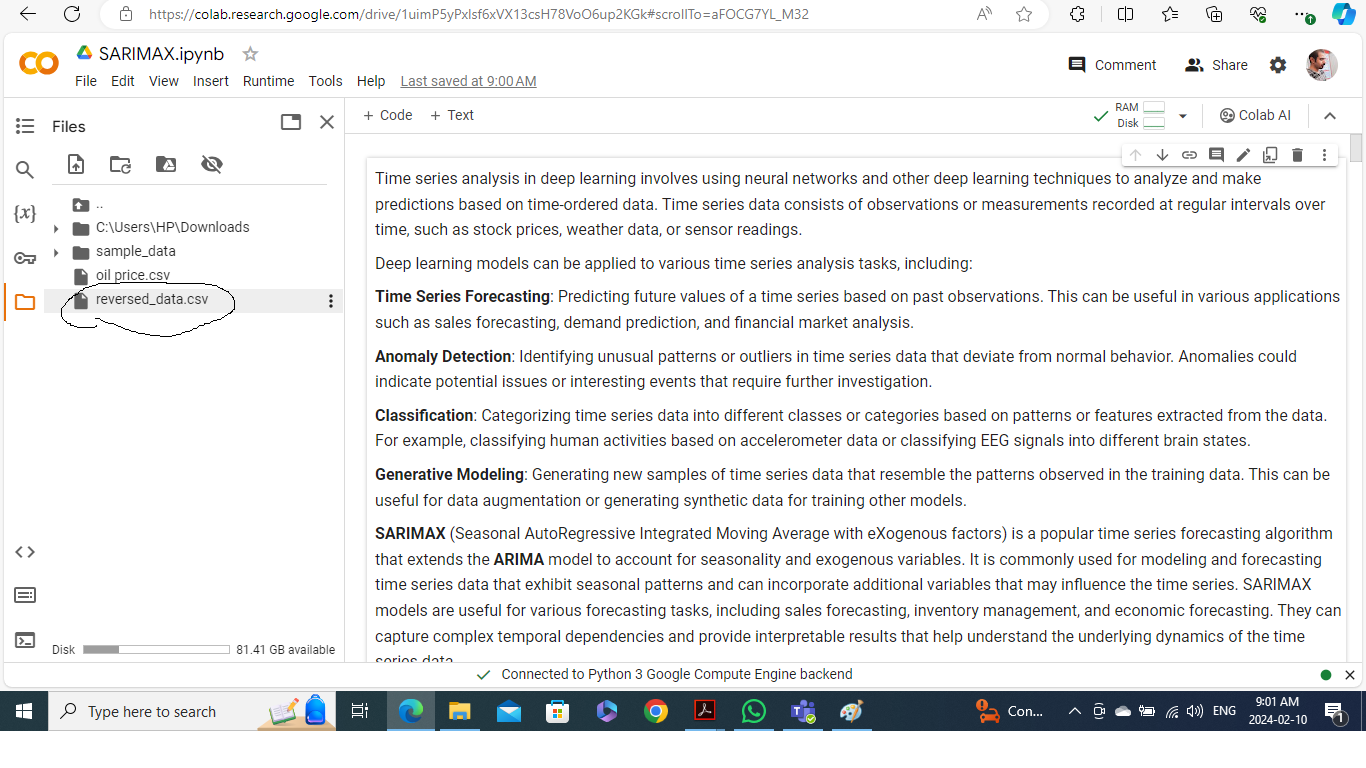

# Forcasting future Trend

In [15]:
df= pd.read_csv("oil price updated dataset.csv")
df.head()

Date   Open
0  01-Jan-01  27.25
1  08-Jan-01  28.20
2  15-Jan-01  30.10
3  22-Jan-01  31.95
4  29-Jan-01  30.15

In [16]:
# add SARIMAX library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
# make our model object
model = SARIMAX(df["Open"] , order=(3,1,3) , seasonal_order=(2,1,2,4))

In [18]:
# fit the model for training
response= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# summery the model
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   Open   No. Observations:                 1206
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood               -3121.187
Date:                                Sat, 10 Feb 2024   AIC                           6264.375
Time:                                        14:16:01   BIC                           6320.375
Sample:                                             0   HQIC                          6285.469
                                               - 1206                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007      0.259      0.003      0.998      -0.508       0.509
ar.L2          0.1624      0.199      0.816      0.415      -0.228       0.552
ar.L3          0.3983      0.180      2.207      0.027       0.045       0.752
ma.L1         -0.0018      0.260     -0.007      0.994      -0.512       0.508
ma.L2         -0.2077      0.207     -1.002      0.317      -0.614       0.199
ma.L3         -0.2807      0.194     -1.450      0.147      -0.660       0.099
ar.S.L4       -0.7768      0.209     -3.719      0.000      -1.186      -0.367
ar.S.L8        0.0537      0.036      1.472      0.141      -0.018       0.125
ma.S.L4       -0.1754      0.220     -0.798      0.425      -0.606       0.256
ma.S.L8       -0.8069      0.217     -3.718      0.000      -1.232      -0.382
sigma2        10.4427      0.239     43.754      0.000       9.975      10.910
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1504.28
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# add new feature to dataframe ---> df["SARIMAX"]
df["SARIMAX"] = response.fittedvalues

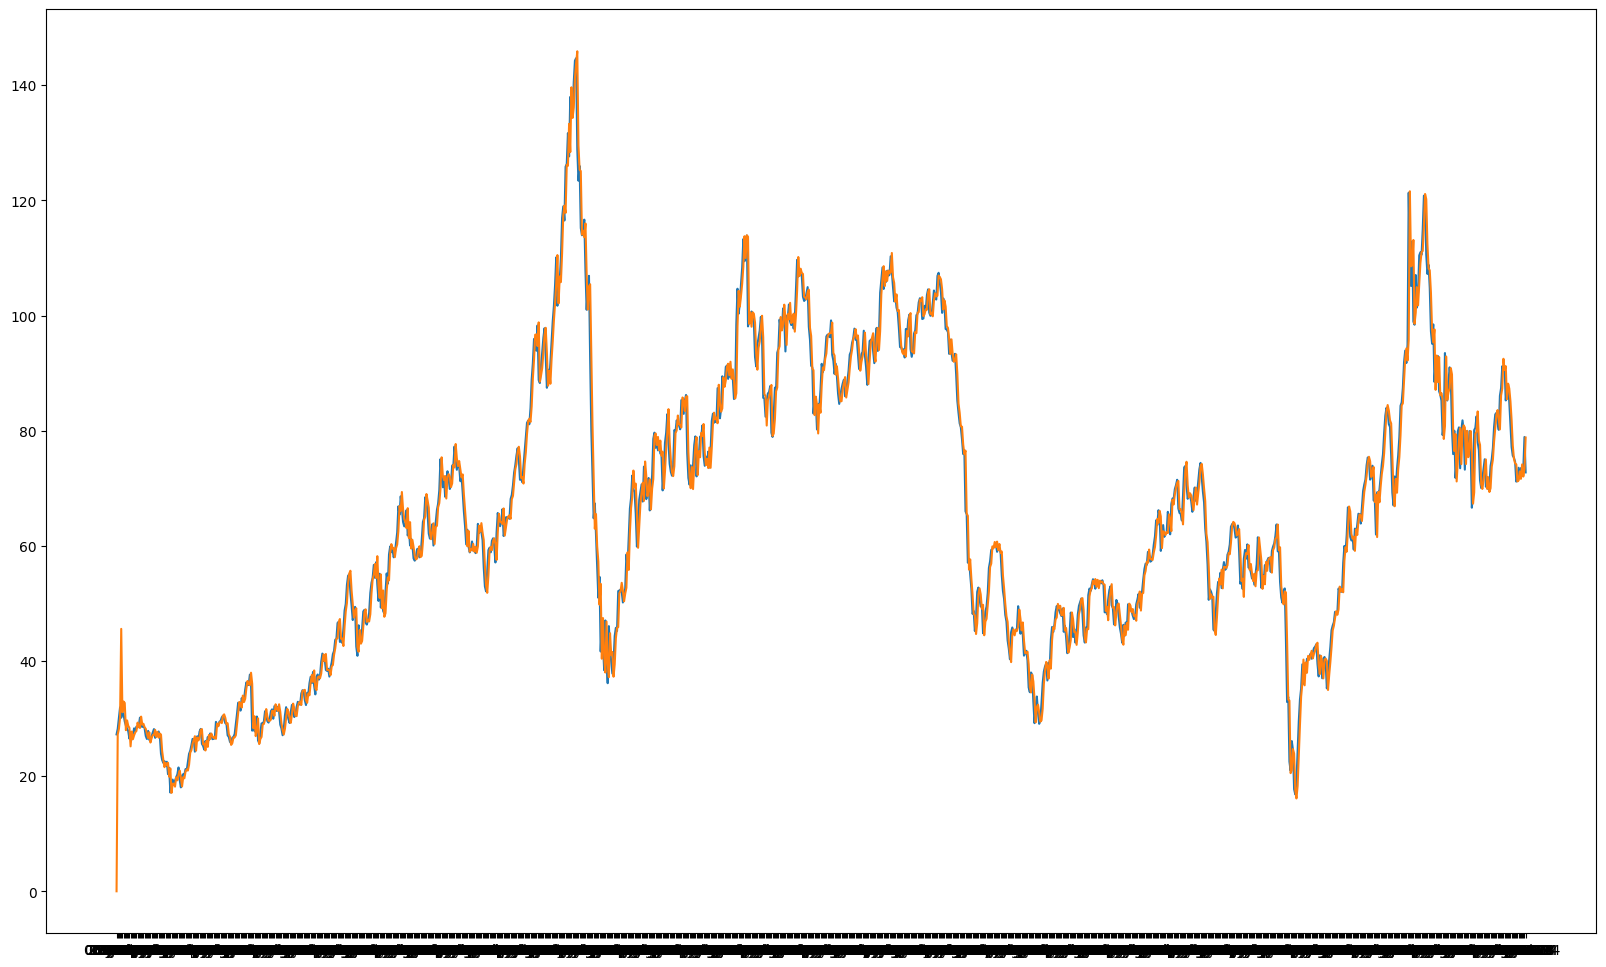

In [21]:
#plotting real data and SARIMAX data
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.plot(df["Date"] , df["SARIMAX"])
plt.show()

In [22]:
# first 5 index ----> NaN
df["SARIMAX"][:5]= np.NaN
forcast= response.predict(start = len(df) , end= len(df) + 54 )
# len(df) + 54 ----> forcast for next year, each year has 54 week.

<ipython-input-22-30922ffe36a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SARIMAX"][:5]= np.NaN


In [23]:
# forcasting data for next 54 week in future
forcast

1206    72.765051
1207    73.639295
1208    72.900343
1209    72.953215
1210    73.556034
1211    73.050176
1212    73.043231
1213    72.969941
1214    73.176733
1215    73.033047
1216    72.791398
1217    73.038683
1218    73.408406
1219    73.157423
1220    73.064893
1221    73.026396
1222    73.335325
1223    73.153456
1224    72.934651
1225    73.164587
1226    73.516449
1227    73.280723
1228    73.177542
1229    73.179312
1230    73.498328
1231    73.311251
1232    73.110374
1233    73.305819
1234    73.653715
1235    73.425844
1236    73.308043
1237    73.341180
1238    73.664990
1239    73.471876
1240    73.284468
1241    73.454217
1242    73.798500
1243    73.576284
1244    73.447495
1245    73.502496
1246    73.829631
1247    73.631937
1248    73.453919
1249    73.605428
1250    73.947011
1251    73.728728
1252    73.592117
1253    73.662504
1254    73.991953
1255    73.790992
1256    73.619576
1257    73.758174
1258    74.097829
1259    73.882310
1260    73.740159
Name: pred

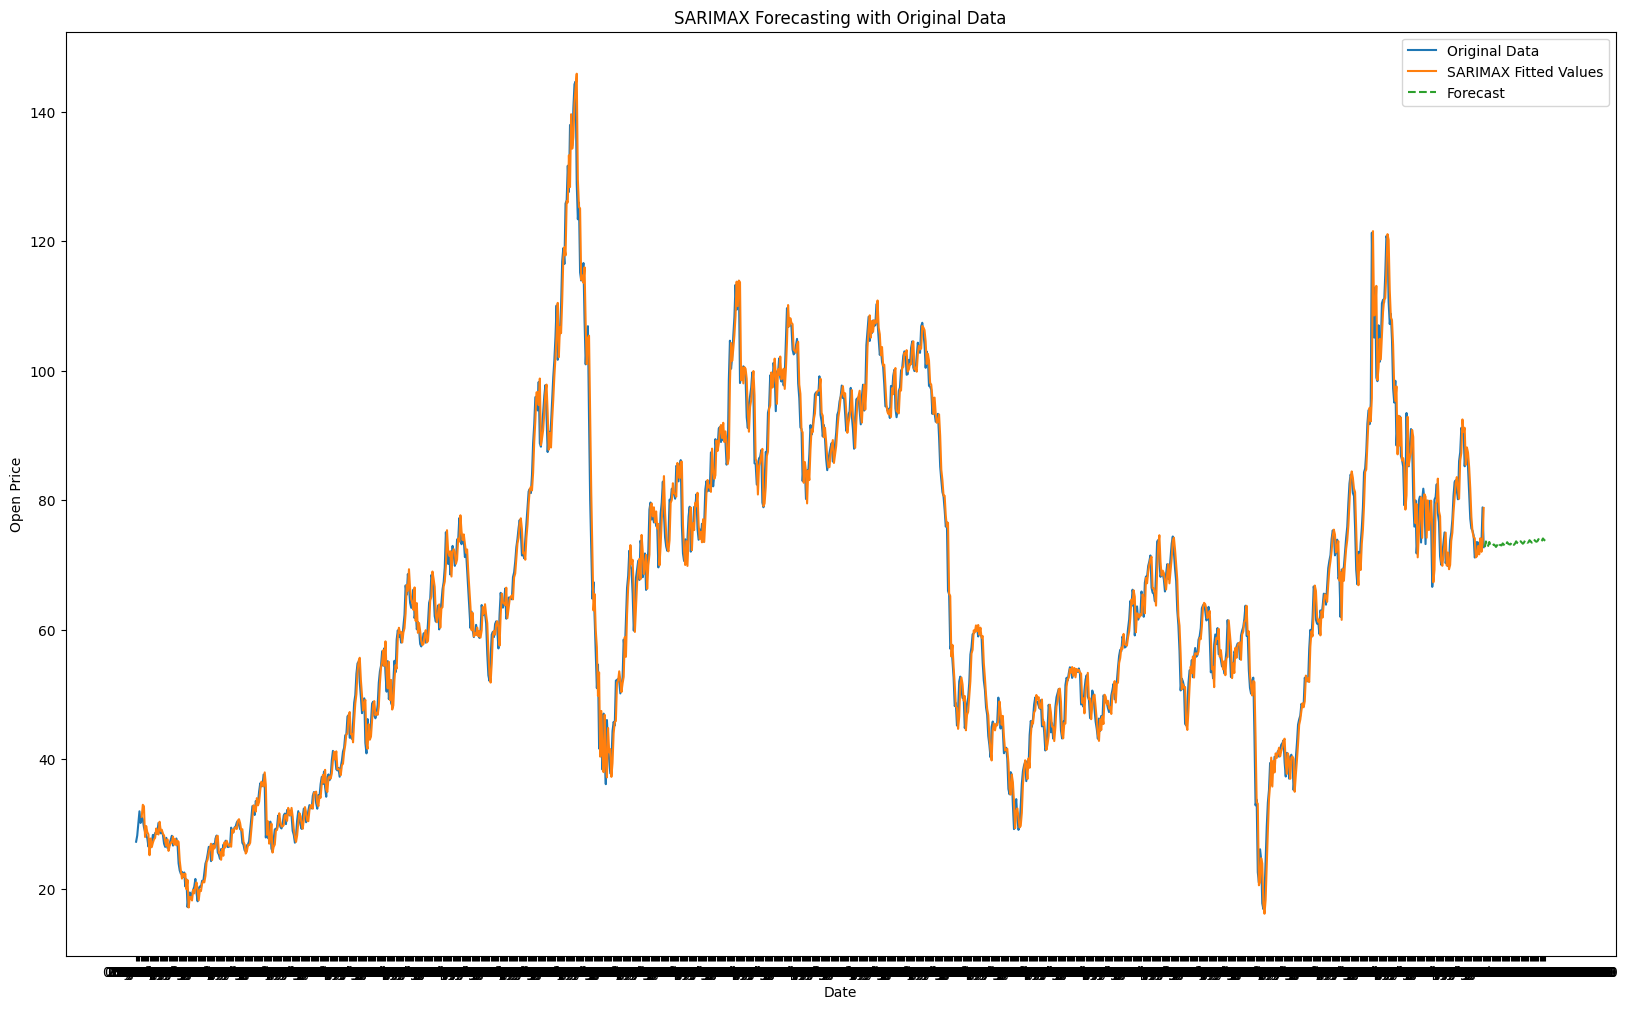

In [25]:
# Plotting forecasted values
import matplotlib.pyplot as plt

# Convert forecast_dates to strings
forecast_dates_str = [str(date) for date in forecast_dates]

# Plotting previous chart with SARIMAX predictions
plt.figure(figsize=(20, 12))
plt.plot(df["Date"], df["Open"], label="Original Data")
plt.plot(df["Date"], df["SARIMAX"], label="SARIMAX Fitted Values")

# Plotting forecasted values
plt.plot(forecast_dates_str, forcast, label="Forecast", linestyle='--')

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("SARIMAX Forecasting with Original Data")
plt.legend()
plt.show()


# Hyper parameter of SARIMAX with for loop to find best number and minimize AIC.

In [1]:
p = range(0,10,1)  #----> range 0 to 10, add one by one
d=1 # differential 1 is enough for this dataset
q= range(0,10,1)
sp= range(0,10,1)
ds=1
sq= range(0,10,1)
s= 4


In [5]:
# product consider different combination state of parameters
from itertools import product
parameters= list(product(p, q,sp,sq))
# d,ds,s is constant so we dont need to put them in product

# show 12 first of combination of parameters
print(parameters[0:12])

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 0, 4), (0, 0, 0, 5), (0, 0, 0, 6), (0, 0, 0, 7), (0, 0, 0, 8), (0, 0, 0, 9), (0, 0, 1, 0), (0, 0, 1, 1)]


In [9]:
import pandas as pd

results = []
for order in parameters:
    try:
        model = SARIMAX(df["Open"], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[2], s))
        response = model.fit()
        results.append([order, response.aic])
    except:
        continue

# in some combination of orders we got error by SARIMAX  to scape from the error problem use try and except method

In [ ]:
print(results)

# Facebook Prophet
Facebook Prophet is an open-source forecasting tool developed by Facebook's Core Data Science team. It is designed to make time series forecasting tasks accessible to non-experts by providing a simple yet powerful interface for modeling time series data. Here are some key points about Facebook Prophet:

**Automatic Seasonality Detection**: Prophet can automatically detect and model various types of seasonality present in the data, including yearly, weekly, and daily patterns.

**Flexible Trend Modeling**: It allows for flexible trend modeling, where the user can specify various types of trend changes and adjust the sensitivity of trend changes to capture both short-term fluctuations and long-term trends in the data.

**Holiday Effects**: Prophet can incorporate holiday effects into the forecasting model, allowing for the modeling of holidays and their impacts on time series data.

**Handling Missing Data**: It handles missing data and outliers gracefully, allowing users to include data with missing values in the analysis without imputation.

**Scalability**: While Prophet is optimized for large-scale forecasting tasks, it can also handle smaller datasets efficiently.

**Interpretable Results**: Prophet provides easily interpretable results, including trend components, seasonality, and uncertainty intervals.

**Robustness**: It is robust to changes in the input data and can handle irregularly spaced time series data.

Facebook Prophet can be used to solve various time series forecasting problems, including but not limited to:

- Demand Forecasting: Forecasting demand for products or services over time.

- Financial Forecasting: Predicting stock prices, currency exchange rates, or other financial metrics.

- Resource Planning: Forecasting resource utilization in areas like manufacturing, transportation, or healthcare.

- Capacity Planning: Forecasting future capacity requirements for infrastructure or services.

- Anomaly Detection: Identifying abnormal patterns or outliers in time series data.


Overall, Facebook Prophet is a versatile tool that can be applied to a wide range of time series forecasting tasks and is particularly useful for users who are new to time series analysis or forecasting.

In [4]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# Step 1: Install the required libraries
!pip install pandas fbprophet


In [ ]:
# Step 2: Import necessary libraries
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [ ]:
# Step 3: Load the dataset
data = pd.read_csv("oilPrice.csv")

# Display the first few rows of the dataset
print(data.head())


In [ ]:
# Step 4: Preprocess the data
# Prophet expects the input DataFrame to have two columns: 'ds' (datetime) and 'y' (numeric value to forecast)
# Rename the columns accordingly
data = data.rename(columns={"Date": "ds", "OilPrice": "y"})

# Convert the 'ds' column to datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Display the preprocessed data
print(data.head())


In [ ]:
# Step 5: Create and fit the Prophet model
model = Prophet()
model.fit(data)


In [ ]:
# Step 6: Make predictions
future = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days) into the future
forecast = model.predict(future)

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [ ]:
# Step 7: Visualize the results
model.plot(forecast, xlabel='Date', ylabel='Oil Price')
plt.title('Oil Price Forecast')
plt.show()


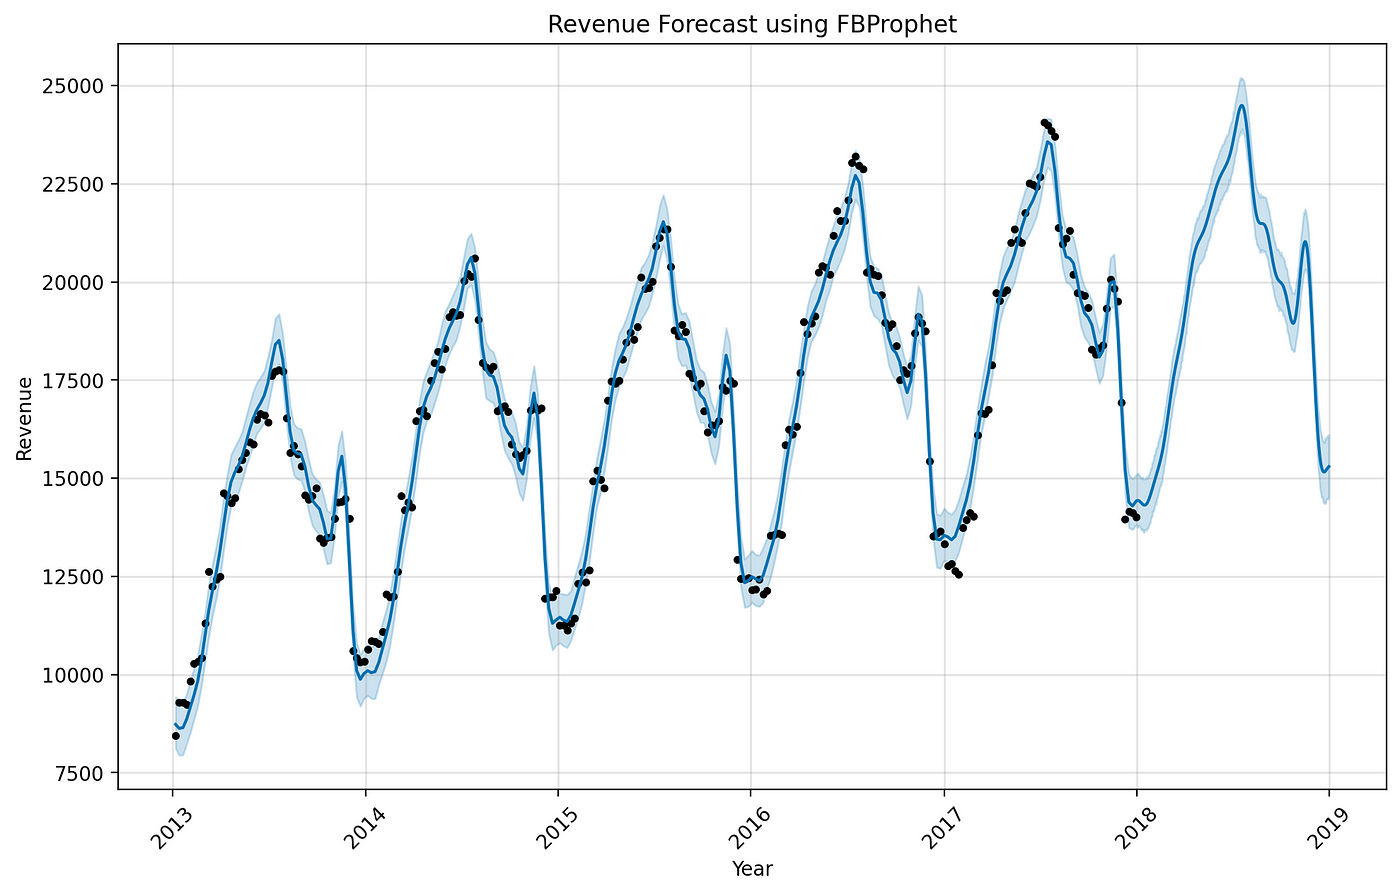